<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/kerasgenerativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import LambdaCallback
import random
import sys
import matplotlib.pyplot as plt

# Cargar el archivo de texto
file_path = 'texto.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

Epoch 1/100
11417/11417 [==============================] - 209s 18ms/step - loss: 2.5076 - accuracy: 0.2950 - val_loss: 2.1298 - val_accuracy: 0.3970
Epoch 2/100
11417/11417 [==============================] - 203s 18ms/step - loss: 1.9775 - accuracy: 0.4524 - val_loss: 1.8154 - val_accuracy: 0.4948
Epoch 3/100
11417/11417 [==============================] - 206s 18ms/step - loss: 1.7444 - accuracy: 0.5212 - val_loss: 1.6557 - val_accuracy: 0.5407
Epoch 4/100
11417/11417 [==============================] - 205s 18ms/step - loss: 1.6172 - accuracy: 0.5575 - val_loss: 1.5784 - val_accuracy: 0.5644
Epoch 5/100
11417/11417 [==============================] - 207s 18ms/step - loss: 1.5381 - accuracy: 0.5794 - val_loss: 1.5045 - val_accuracy: 0.5857
Epoch 6/100
11417/11417 [==============================] - 205s 18ms/step - loss: 1.4833 - accuracy: 0.5935 - val_loss: 1.4685 - val_accuracy: 0.5968
Epoch 7/100
11417/11417 [==============================] - 205s 18ms/step - loss: 1.4417 - accuracy:

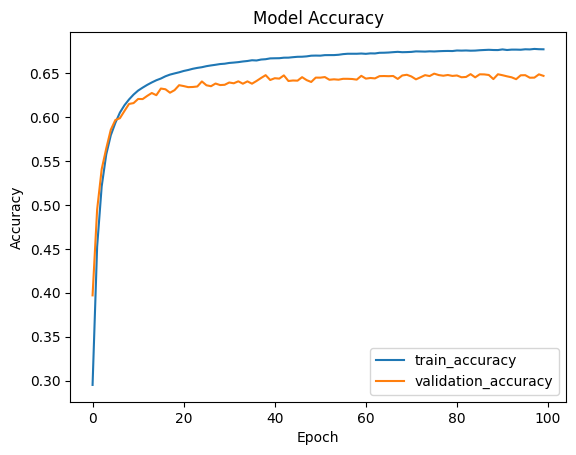

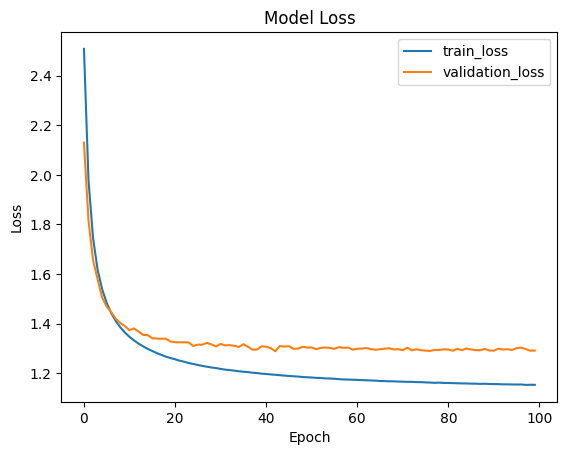

Here is management health orgections result of human for urineg universal health world centern many samples.


In [ ]:
# Tokenización
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(text)
max_id = len(tokenizer.word_index)  # número de caracteres distintos
input_sequences = [tokenizer.texts_to_sequences([char])[0][0] for char in text]

# Crear secuencias de entrada
max_len = 10
features = []
labels = []
for i in range(0, len(input_sequences) - max_len):
    features.append(input_sequences[i:i+max_len])
    labels.append(input_sequences[i+max_len])

# Padding y one-hot encoding
X = pad_sequences(features, maxlen=max_len)
y = to_categorical(labels, num_classes=max_id+1)

# Construcción del Modelo
model = Sequential()
model.add(Embedding(input_dim=max_id+1, output_dim=8, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(max_id+1, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del Modelo
history = model.fit(X, y, epochs=100, batch_size=64, validation_split=0.1)

# Gráficas de precisión y pérdida
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Generación de Texto
def generate_text(seed_text, next_chars=100):
    for _ in range(next_chars):
        token_list = tokenizer.texts_to_sequences([seed_text])[-1]
        token_list = pad_sequences([token_list], maxlen=max_len, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_index = np.random.choice(range(max_id+1), p=predicted_probs)
        predicted_char = tokenizer.sequences_to_texts([[predicted_index]])[0]
        seed_text += predicted_char
    return seed_text

print(generate_text("Here is ", next_chars=100))